In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno 

In [61]:
# Membaca masing masing data set serta menampilkan 5 sampling data dari setiap data set train dan test
df_train = pd.read_csv('aug_train.csv')
df_test = pd.read_csv('aug_test.csv')
df_train.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
5879,17451,city_162,0.767,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,NaN,NaN,1,55,0.0
2631,33265,city_114,0.926,Male,No relevent experience,Full time course,NaN,NaN,7,10/49,Pvt Ltd,1,45,0.0
802,33358,city_159,0.843,Female,Has relevent experience,no_enrollment,Masters,STEM,7,50-99,Pvt Ltd,1,6,1.0
12683,10845,city_116,0.743,NaN,No relevent experience,Full time course,Masters,STEM,6,10/49,Pvt Ltd,2,79,0.0
1950,27480,city_104,0.924,Male,Has relevent experience,Full time course,Graduate,STEM,6,NaN,NaN,1,45,0.0


In [52]:
df_test.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
1571,11413,city_12,0.640,Male,No relevent experience,Full time course,Graduate,STEM,6,50-99,Pvt Ltd,1,38
681,3395,city_53,0.740,Male,No relevent experience,Full time course,High School,NaN,3,NaN,NaN,1,127
528,9707,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,8,NaN,NaN,2,96
1946,23734,city_162,0.767,Male,Has relevent experience,Full time course,Graduate,STEM,4,<10,Pvt Ltd,never,26
652,31669,city_21,0.624,Male,No relevent experience,Full time course,High School,NaN,<1,NaN,NaN,never,113


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


Deskripsi menggunakan fungsi `info()` untuk mengetahui kondisi dari dataset (tipe data, adanya nilai null, hingga jumlah baris)
- Terdapat 2129 rows
- Tidak ada kolom yang mempunyai nilai NULL, sehingga tidak diperlukan drop null values

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Deskripsi menggunakan fungsi `info()` untuk mengetahui kondisi dari dataset (tipe data, adanya nilai null, hingga jumlah baris)
- Terdapat 19158 rows
- Tidak ada kolom yang mempunyai nilai NULL, sehingga tidak diperlukan drop null values

In [53]:
# Missing Values 
df_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

## More NA values

<BarContainer object of 14 artists>

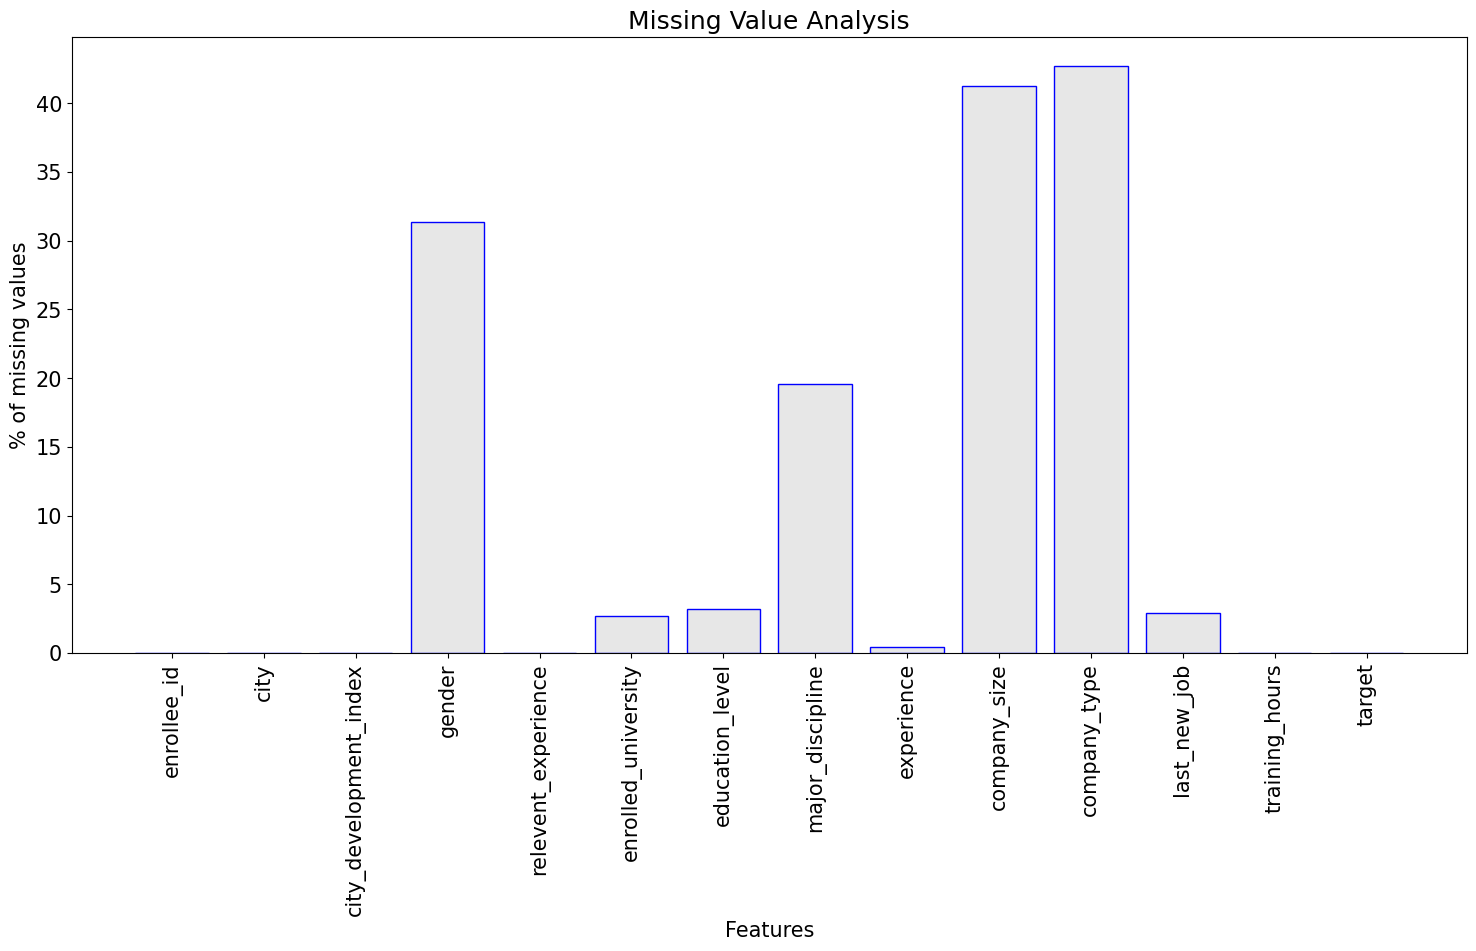

In [54]:
# Missing  Values Percentage
percent_missing = df_train.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})

plt.figure(figsize = (18,8))
plt.rcParams.update({'font.size': 15})
plt.xticks(rotation=90)
plt.title("Missing Value Analysis")
plt.xlabel("Features")
plt.ylabel("% of missing values")
plt.bar(missing_value_df["column_name"],missing_value_df["percent_missing"],color=(0.1, 0.1, 0.1, 0.1),edgecolor='blue')

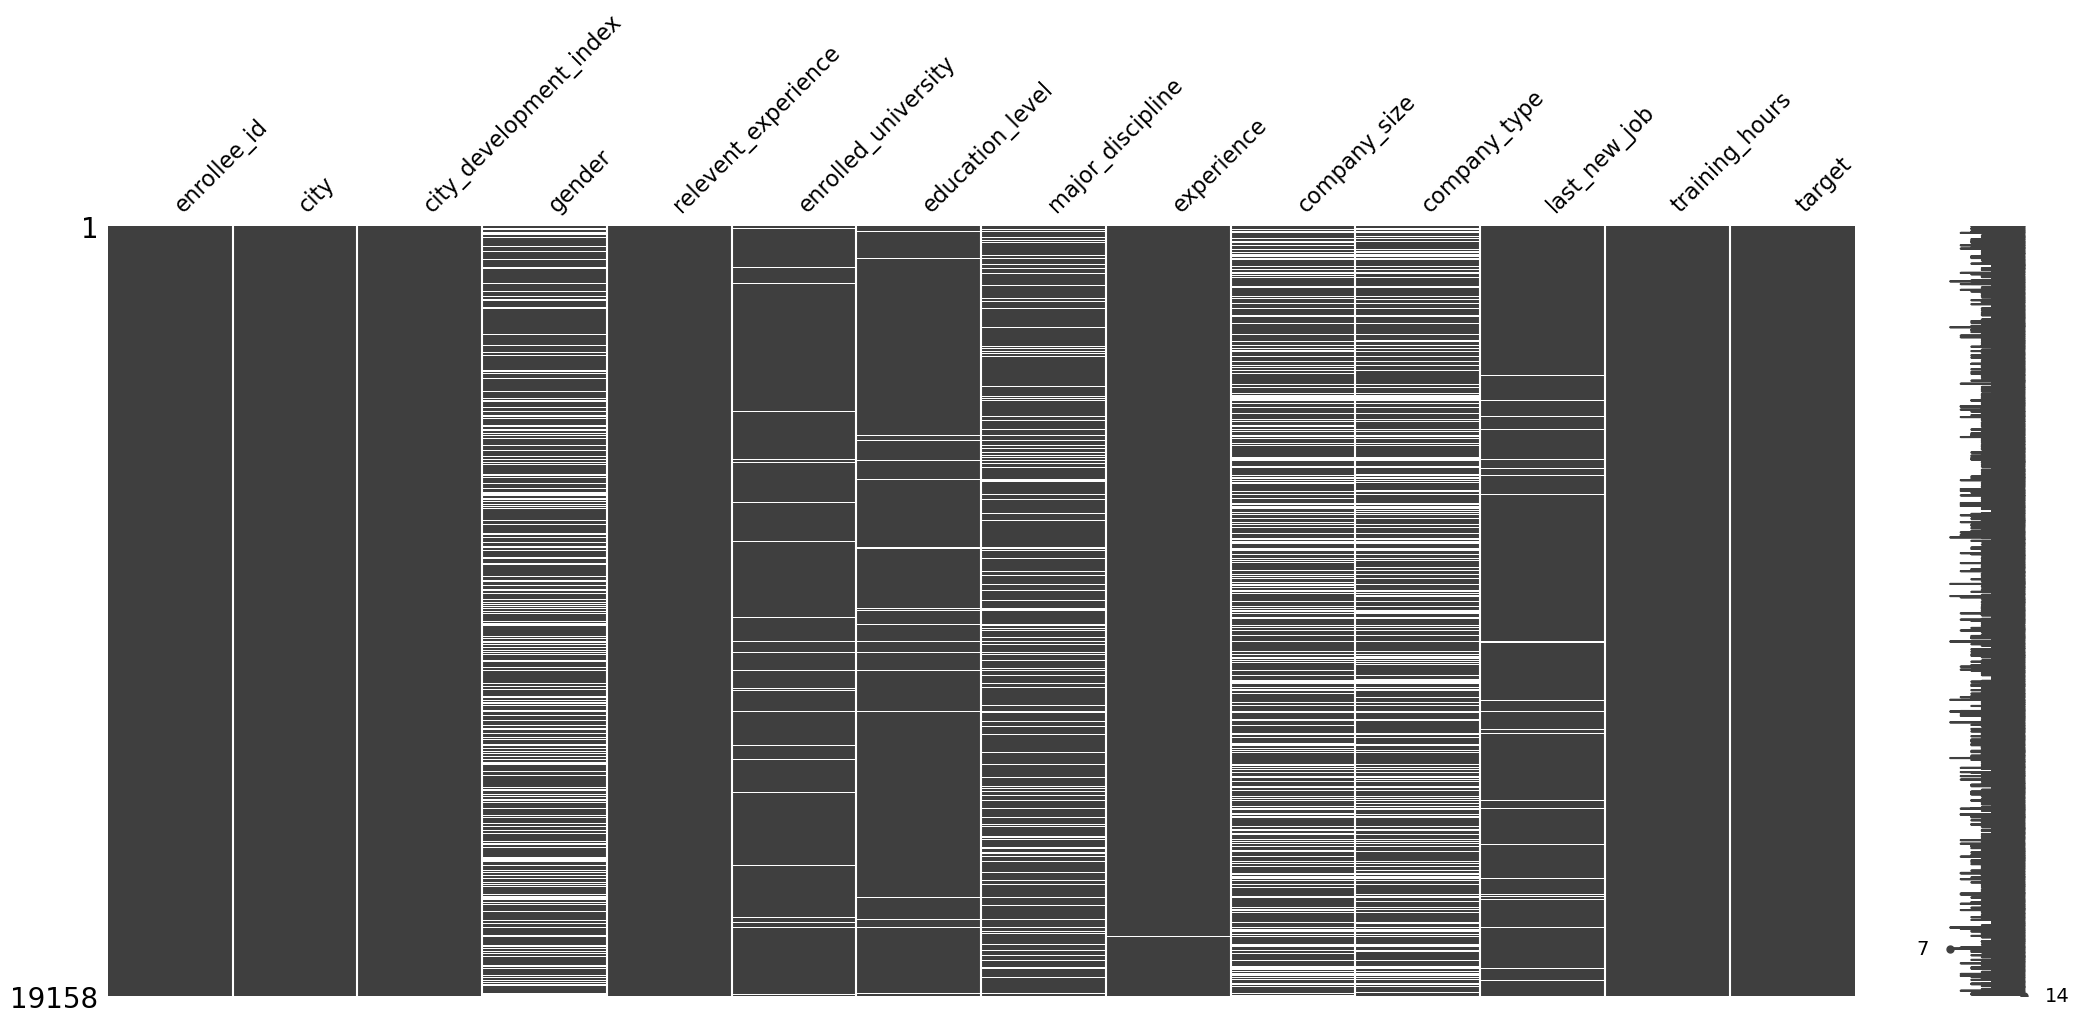

<Figure size 1500x900 with 0 Axes>

In [20]:
msno.matrix(df_train)
plt.figure(figsize = (15,9))
plt.show()

<Axes: >

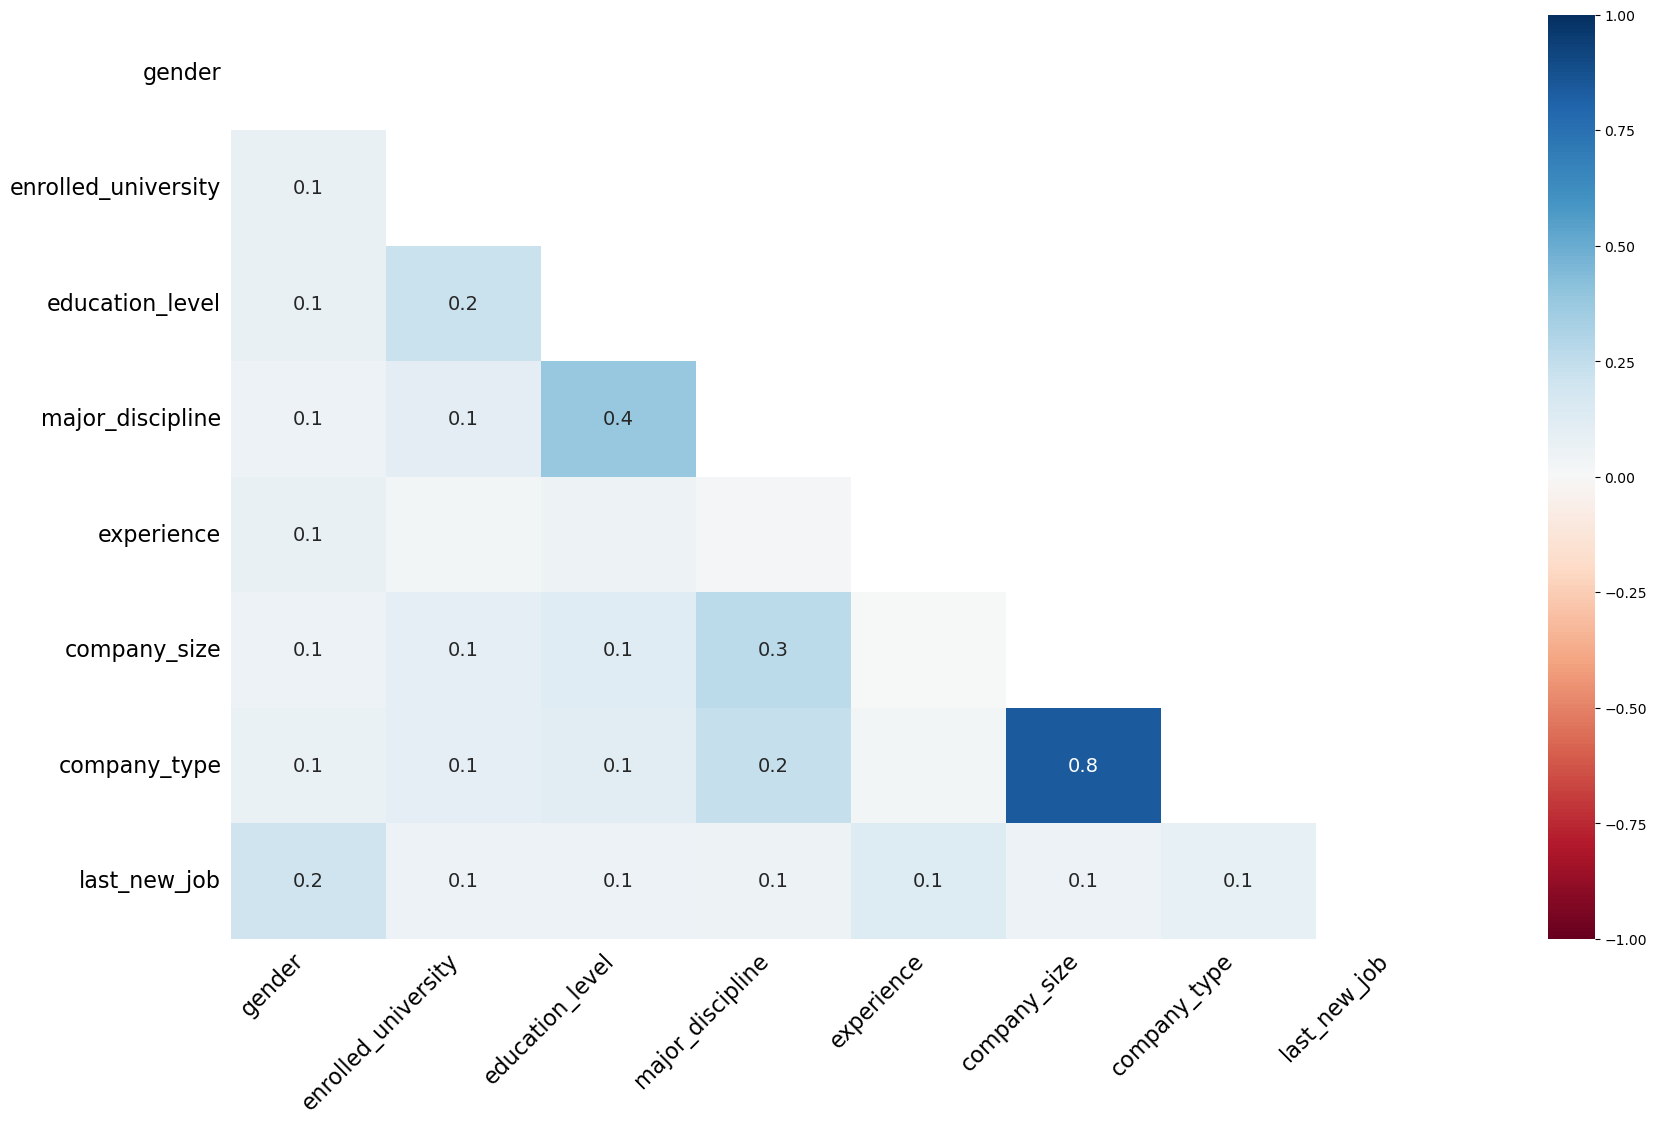

In [21]:
msno.heatmap(df_train, labels = True)

In [22]:
# Columns having missing values
missing_columns = [col for col in df_train.columns if df_train[col].isnull().sum() > 0]
missing_columns

['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

<Axes: >

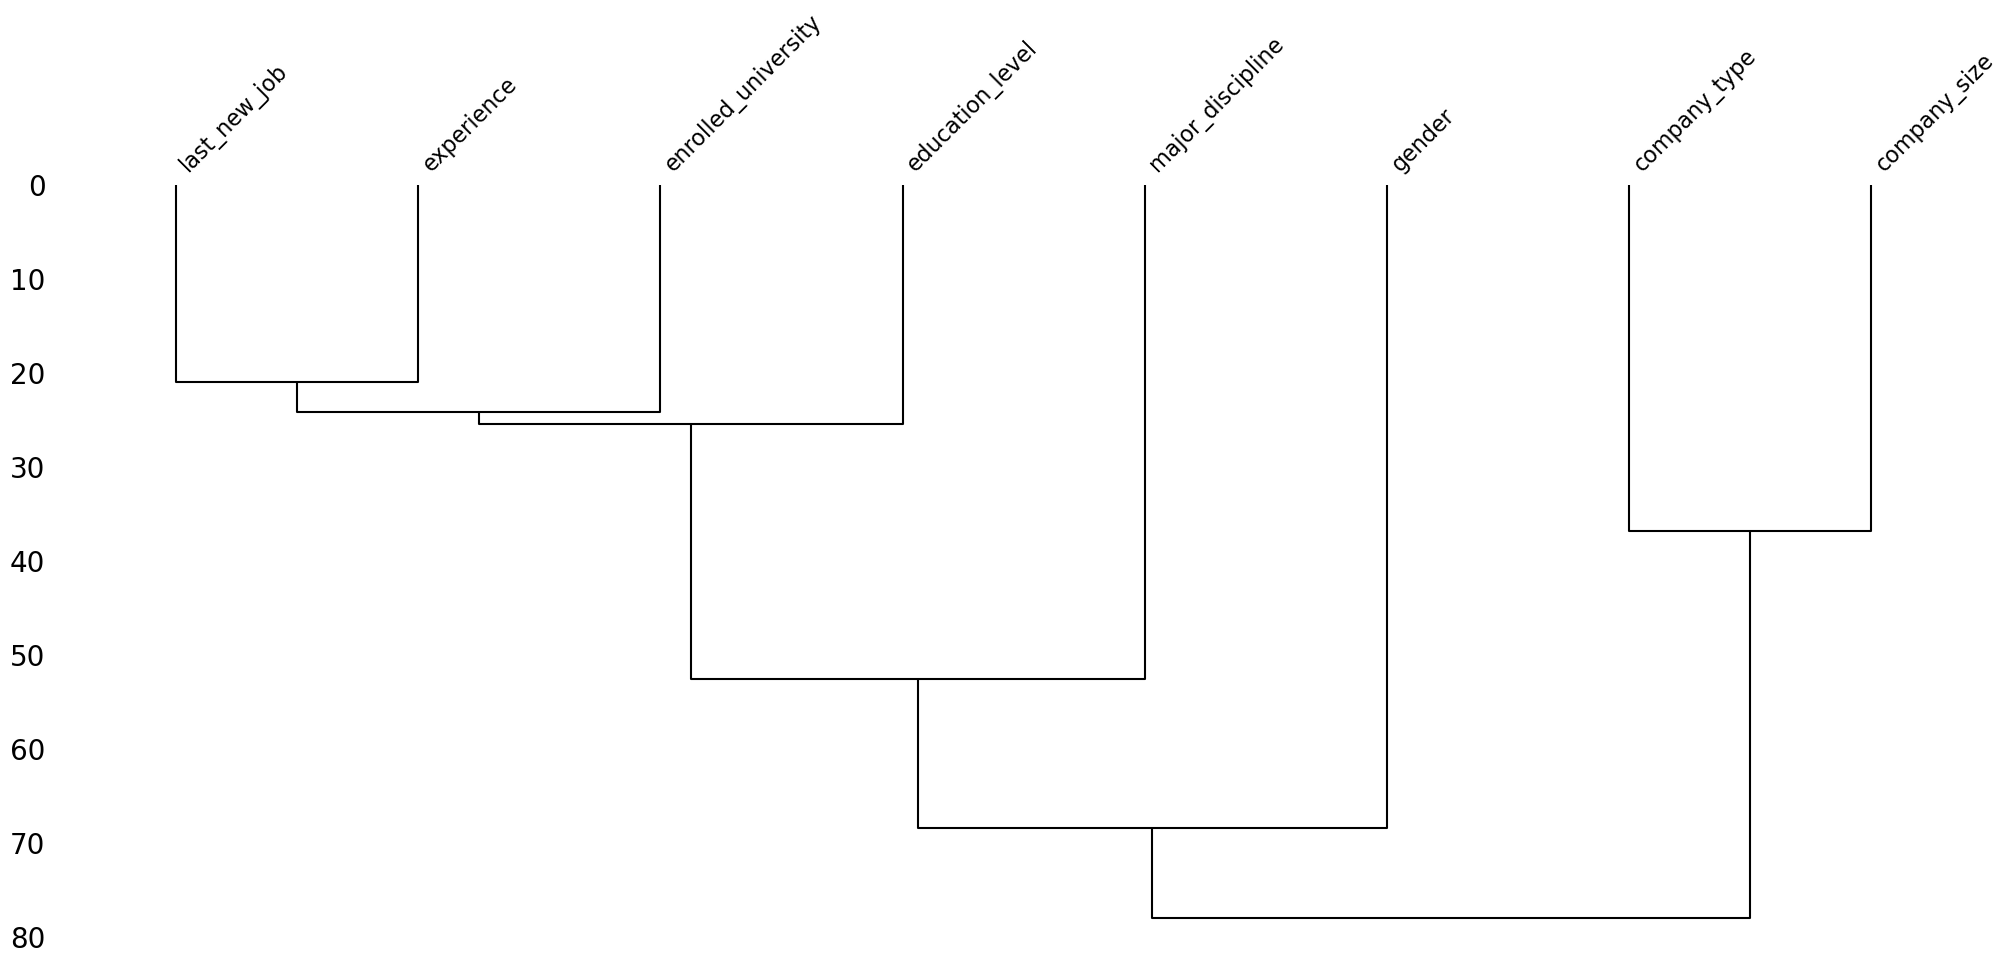

In [24]:
msno.dendrogram(df_train[missing_columns])

In [26]:
def get_numerical_summary(df_train):
    total = df_train.shape[0]
    missing_columns = [col for col in df_train.columns if df_train[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df_train[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent
missing_percent = get_numerical_summary(df_train)

gender : 4508 (23.531%)
enrolled_university : 386 (2.015%)
education_level : 460 (2.401%)
major_discipline : 2813 (14.683%)
experience : 65 (0.339%)
company_size : 5938 (30.995%)
company_type : 6140 (32.049%)
last_new_job : 423 (2.208%)


## Exploratory Data Analaysis

In [55]:
# Splitting up numerical & categorical columns
df_categorical = df_train.select_dtypes(include='object')
df_numerical = df_train.select_dtypes(exclude='object')

In [56]:
# Returns five point summary for  numerical columns
df_numerical.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [57]:
# Returns summary statistics for categorical columns
df_categorical.describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


#### Distribution of different educational level

In [58]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

el = df_train['education_level'].value_counts().reset_index()
el.columns = [
    'education_level', 
    'percent'
]
el['percent'] /= len(df)

fig = px.pie(
    el, 
    names='education_level', 
    values='percent', 
    title='Education_level', 
    width=800,
    height=500 
)

fig.show()

#####  Countplots with respect to educational level
This dataset contains 5 education level:
- Graduate
- Masters
- High School
- PhD
- Primary School

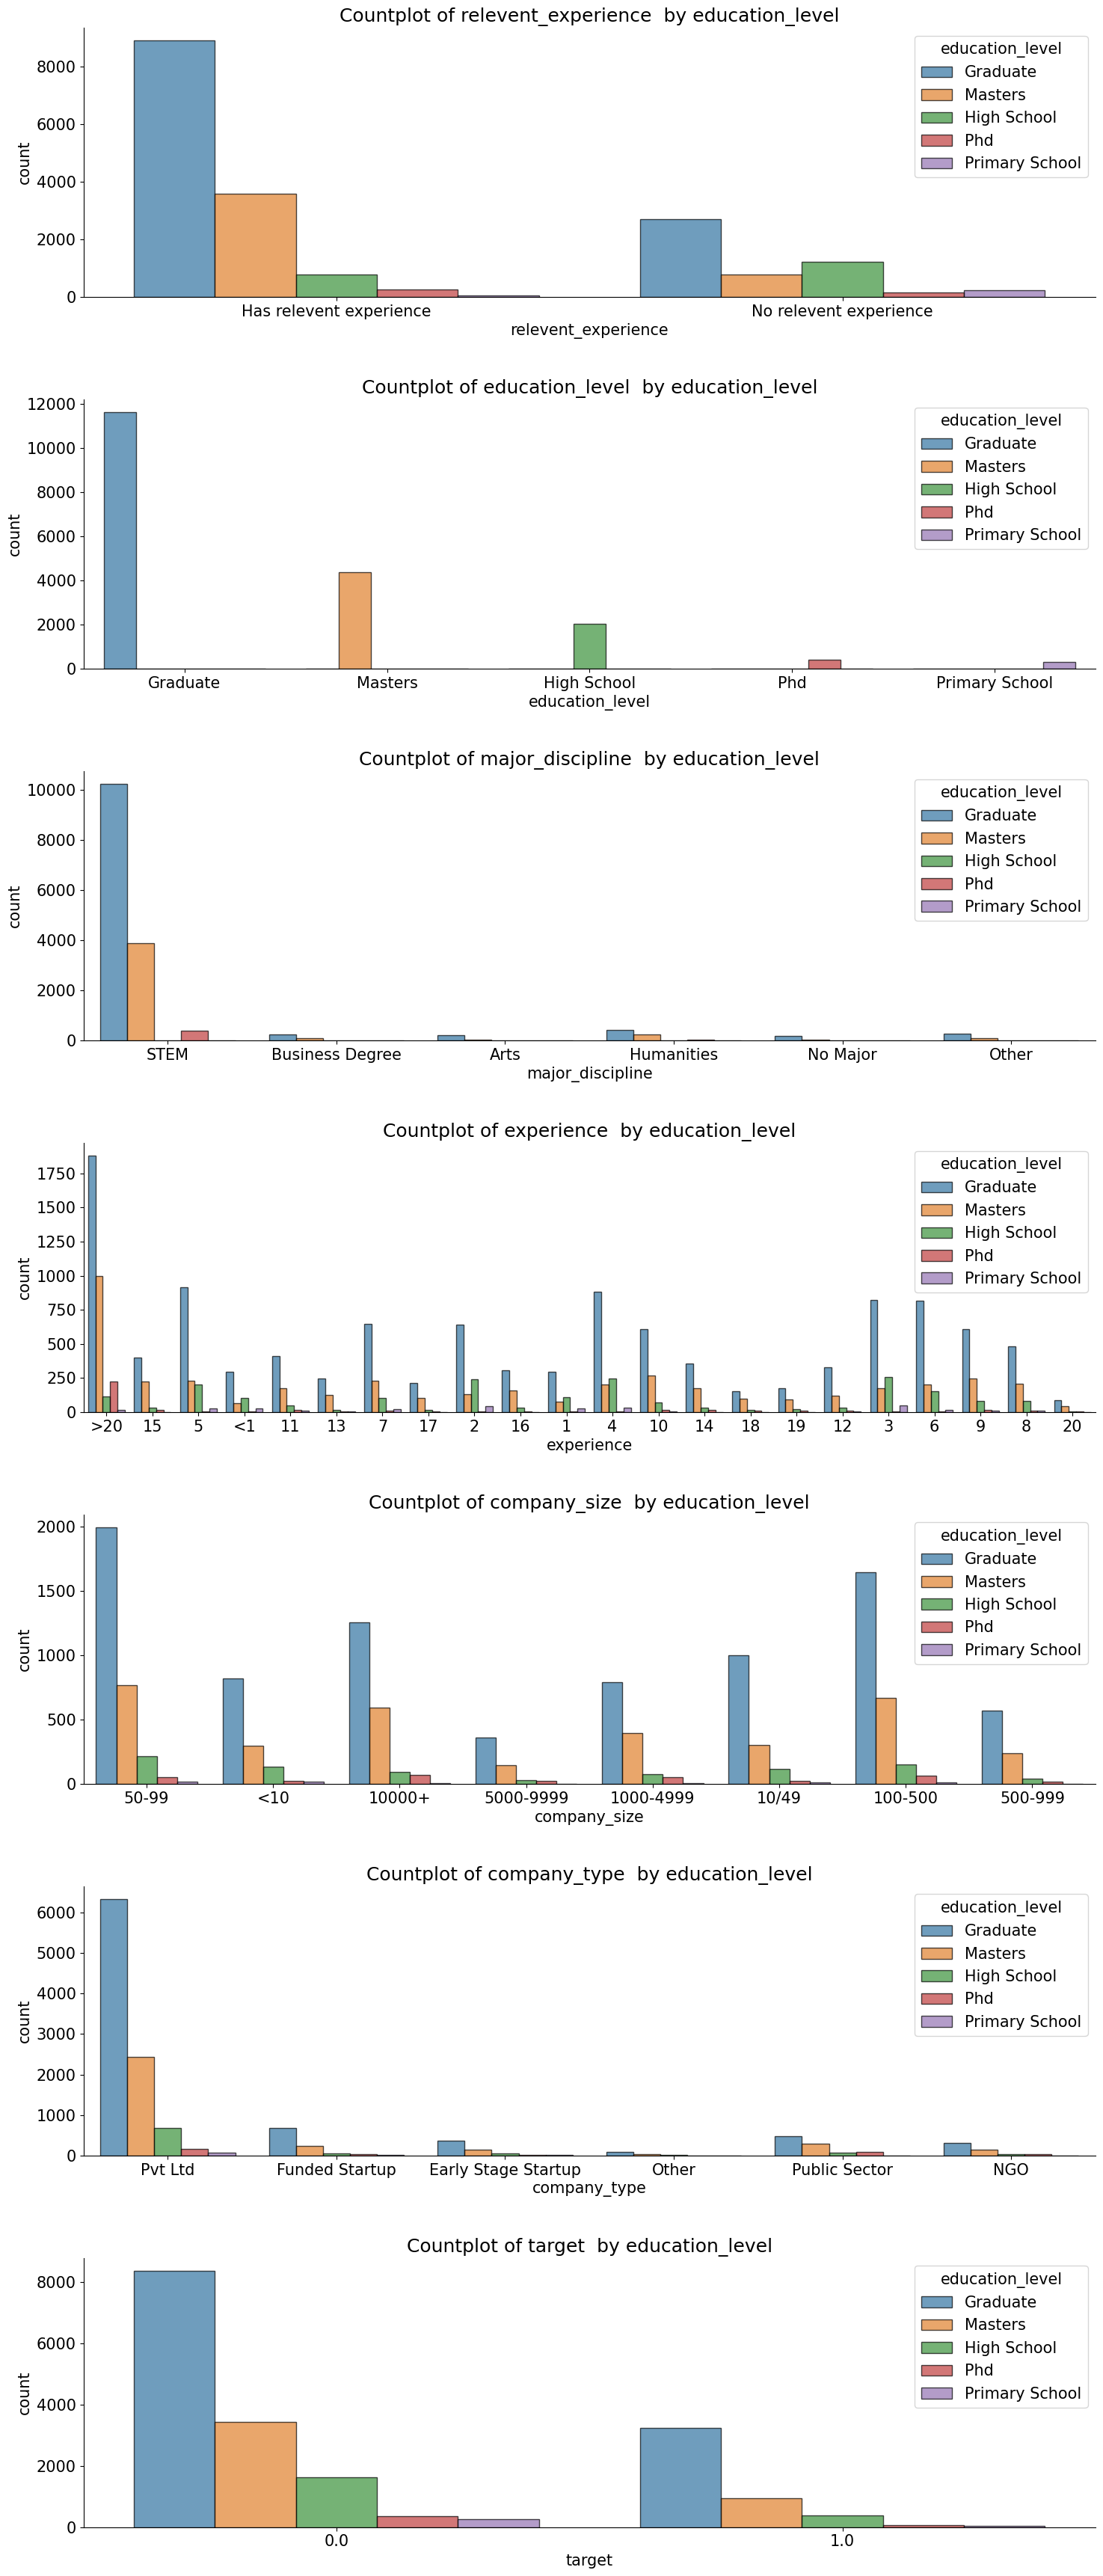

In [63]:
#Countplots showing the frequency of each category with respect to education level 

plt.figure(figsize=[15,35])
plot=["relevent_experience", "education_level","major_discipline", "experience","company_size","company_type","target"]
n=1
for f in plot:
    plt.subplots_adjust(hspace=2)
    plt.subplot(7,1,n)
    
    sns.countplot(x=f, hue='education_level', edgecolor="black", alpha=0.7, data=df_train)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(f))
    n=n+1
plt.tight_layout()
plt.show()

#### Pairplot with numerical values

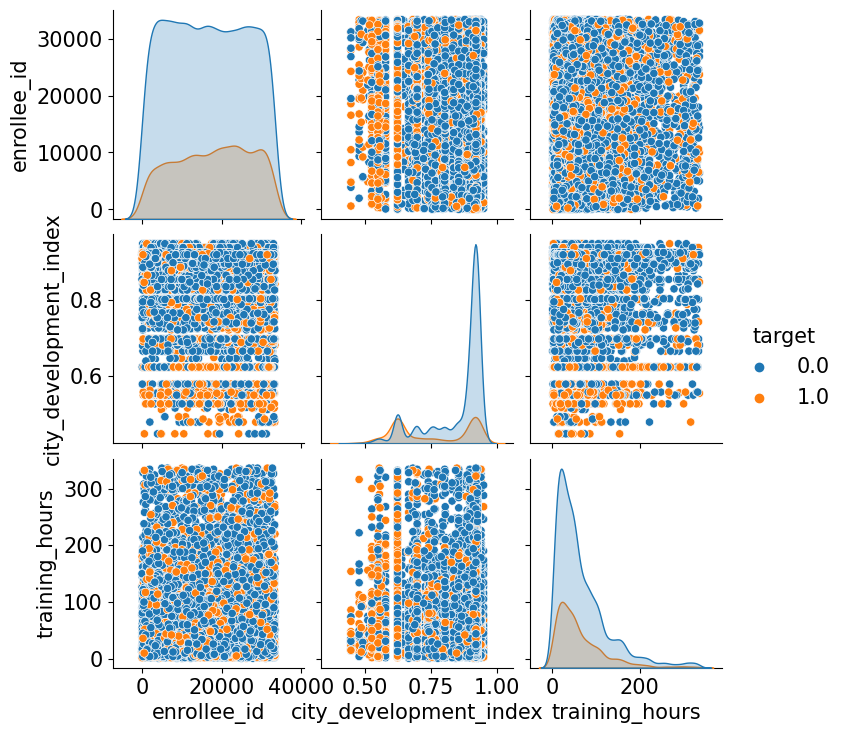

In [64]:
sns.pairplot(df_train, hue ='target')

#### Distribution of experience of employees

In [65]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

ep = df_train['experience'].value_counts().reset_index()
ep.columns = [
    'experience', 
    'percent'
]
ep['percent'] /= len(df_train)

fig = px.pie(
    ep, 
    names='experience', 
    values='percent', 
    title='Experience', 
    width=800,
    height=500 
)

fig.show()

#### Distribution of Training Hours

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11816\488480751.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Distributional of training_hours')

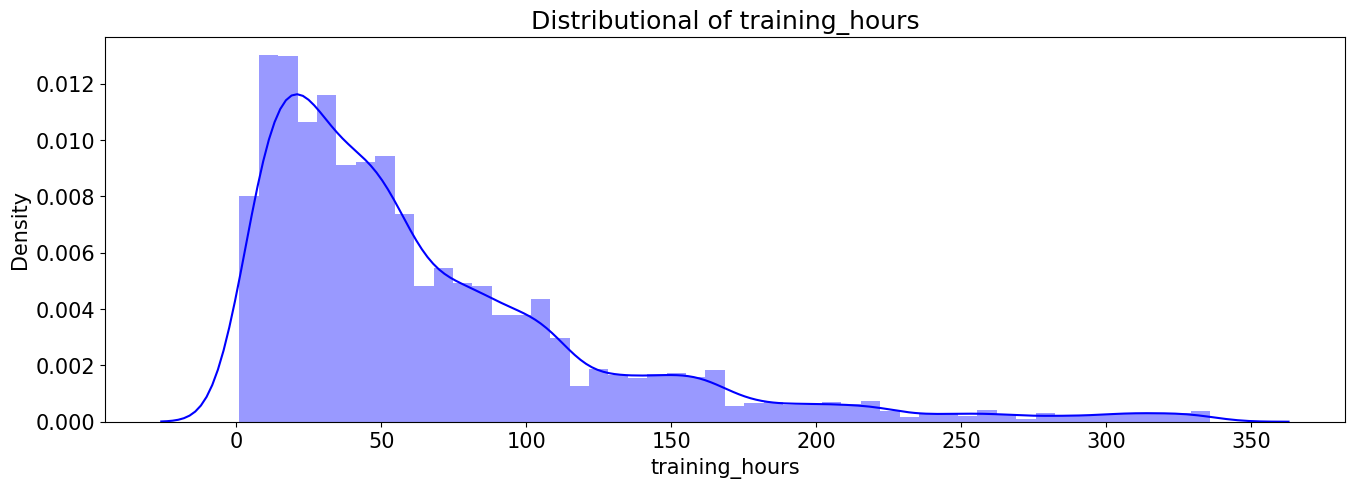

In [66]:
# Taining_hours
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["training_hours"], color="blue",ax = axes)
plt.title("Distributional of training_hours")

#### Education Level Vs Training Hours

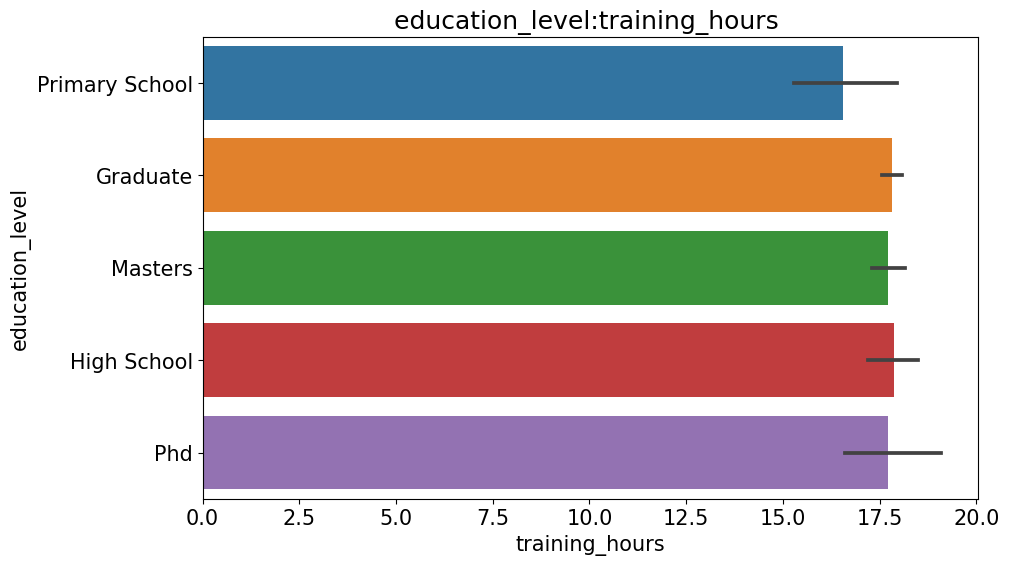

In [67]:
# education_level:training_hours
et = df_train.sort_values(by='training_hours', ascending=True)[:7000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=et.education_level, x=et.training_hours)
plt.xticks()
plt.xlabel('training_hours')
plt.ylabel('education_level')
plt.title('education_level:training_hours ')
plt.show()

#### Essential Functions

In [68]:
def show_me_details(df_train):
    print("Shape of the Dataframe ",df_train.shape)
    print("\n")
    print("Null Value Counts of the features in Dataframe \n\n",df_train.isna().sum())
    print("\n")
    print("Datatypes of the features in Dataframe \n\n",df_train.dtypes)

#### Data Preprocessing

In [78]:
# Removing outlier in expereience feature 
def clean_experience(df_train):
    for i in df_train["experience"]:
        if(i==">20"):
            df_train["experience"][df_train["experience"]==i]=27
        if(i == "<1"):
            df_train["experience"][df_train["experience"]==i]=0

    df_train["experience"] = df_train["experience"].fillna(0)
    df_train["experience"] = df_train['experience'].astype('int')

In [79]:
# Filling NA with new class ("unknown")
def clean_NAN(df_train):
    df_train["gender"] = df_train["gender"].fillna("Unknown")
    df_train["education_level"]=df_train["education_level"].fillna("Unknown")
    df_train["major_discipline"].fillna(value="Unknown", inplace=True)
    df_train["experience"] = df_train["experience"].fillna(df_train["experience"].mean())
    df_train["company_type"] = df_train["company_type"].fillna("Unknown")

NAN Values are replaced with unknown

In [71]:
# Changing range value to fixed integers in company_size feature
def clean_company_size_1(df_train):
    converted_list_1 = []
    converted_list_2 = []
    converted_list_3 = []
    for i in df_train["company_size"]:
        if i == "10/49":
            i = "10-49"
            converted_list_1.append(i)
        converted_list_1.append(i)
        if i == "<10":
            i = '1-9'
            converted_list_2.append(i)
        converted_list_2.append(i)
        if i == "10000+":
            i = '10000-20000'
            converted_list_3.append(i)
        converted_list_3.append(i)
    df_train["company_size"]=pd.Series(converted_list_1)
    df_train["company_size"]=pd.Series(converted_list_2)
    df_train["company_size"]=pd.Series(converted_list_3)
    df_train["company_size"]=df_train["company_size"].fillna("0-0")
    new = df_train['company_size'].str.split("-", n = 1, expand = True) 
    df_train['company_size_min']= new[0]
    df_train['company_size_max']= new[1] 
    df_train["company_size_max"] = df_train['company_size_max'].astype('int')
    df_train["company_size_min"] = df_train['company_size_min'].astype('int')

Cleaning company_size to attain the required format and split them into min and max company_size

In [75]:
# Changing some classes with string values to integers
def clean_last_new_job(df_train):
    converted_list_1 = []
    converted_list_2 = []
    for i in df_train["last_new_job"]:
        if i == "never" or i == np.NaN:
            i = 0
            converted_list_1.append(i)
        converted_list_1.append(i)
        if i == ">4":
            i = 6
            converted_list_2.append(i)
        converted_list_2.append(i)
    df_train["last_new_job"]=pd.Series(converted_list_1)
    df_train["last_new_job"]=pd.Series(converted_list_2)
    df_train["last_new_job"] = df_train["last_new_job"].fillna(0)
    df_train["last_new_job"] = df_train["last_new_job"].astype('int')

In [77]:
df_train.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
14230,17696,city_160,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,11,NaN,NaN,1,33,0.0
6495,19886,city_162,0.767,NaN,Has relevent experience,Full time course,Graduate,STEM,9,NaN,NaN,1,98,1.0
9562,13490,city_114,0.926,Male,Has relevent experience,Full time course,Graduate,STEM,19,10/49,Funded Startup,1,12,1.0
919,31586,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,11,10/49,Pvt Ltd,1,4,0.0
10265,15664,city_36,0.893,Male,Has relevent experience,no_enrollment,High School,NaN,12,100-500,NGO,>4,109,0.0


Cleaning company_size to attain the required format for modelling